<a href="https://colab.research.google.com/github/kokoMontjane1/Adversarial-Machine-learning/blob/main/NearMiss_Undersampling_Adversarial_machine_learning_Base_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries and excel data onto Notebook

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Datasets

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Understanding the dataset

count how many transactions are true = 0, and how many are false = 1

Text(0, 0.5, 'Number of transactions')

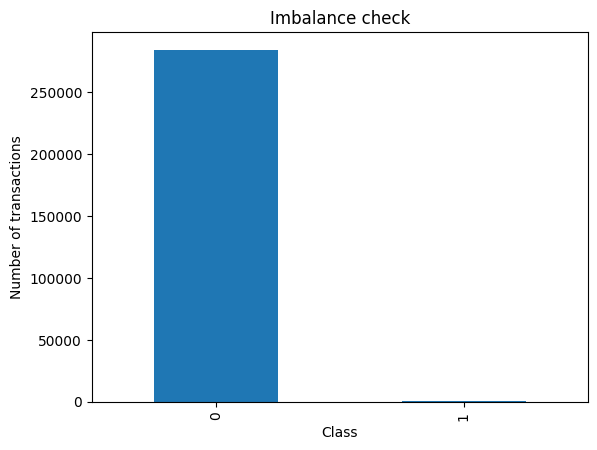

In [5]:

count_class= pd.value_counts(data['Class'], sort = True)
count_class.plot(kind='bar')

plt.title ("Imbalance check")
plt.xlabel ("Class")
plt.ylabel ("Number of transactions")

In [6]:
count_class

0    284315
1       492
Name: Class, dtype: int64

<Axes: ylabel='Frequency'>

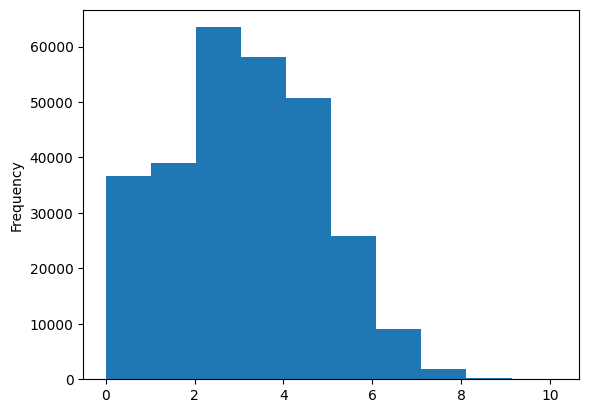

In [7]:
#Normalize the amount column and storing in a new column

data['logAmount'] = np.log(data['Amount']+1)

data['logAmount'].sort_values().plot.hist()

Last time value: 48.00


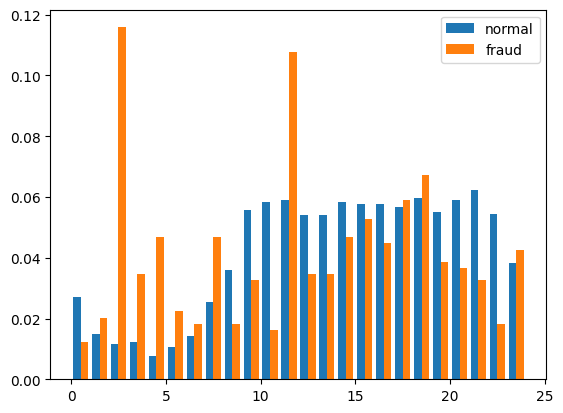

In [8]:
# The 'Time' column is in seconds from first transaction in set
# 48 hours worth of data
# Therefore, we convert the frame to time in hours

print('Last time value: {:.2f}'.format(data['Time'].max() / 3600))

data['Time'] = (data['Time'].values / 3600) % 24


plt.hist( [data.loc[data['Class']==0, 'Time'], data.loc[data['Class']==1, 'Time']], density=True ,label=['normal','fraud'], bins=np.linspace(0,24,25))

plt.legend()
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape (-1,1))
data = data.drop (['Amount','logAmount'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time        284807 non-null  float64
 1   V1          284807 non-null  float64
 2   V2          284807 non-null  float64
 3   V3          284807 non-null  float64
 4   V4          284807 non-null  float64
 5   V5          284807 non-null  float64
 6   V6          284807 non-null  float64
 7   V7          284807 non-null  float64
 8   V8          284807 non-null  float64
 9   V9          284807 non-null  float64
 10  V10         284807 non-null  float64
 11  V11         284807 non-null  float64
 12  V12         284807 non-null  float64
 13  V13         284807 non-null  float64
 14  V14         284807 non-null  float64
 15  V15         284807 non-null  float64
 16  V16         284807 non-null  float64
 17  V17         284807 non-null  float64
 18  V18         284807 non-null  float64
 19  V1

# Separate the data into two, one containing the X values and the other with the y values

In [10]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
len(y[y.Class ==1])

492

# Resampling --> for dealing with imblanced datasets

# Undersampling --> Remove the majority class
- NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples.


In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from imblearn.under_sampling import NearMiss
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X_undersample, y_undersample = undersample.fit_resample(X, y)

In [ ]:
len(y_undersample)

984

In [ ]:
len(X_undersample)

984

Add Noise for Training - Xtrain + noise.

In [12]:
mu=0.0
std = 0.05 * np.std(X_undersample) # for %5 Gaussian noise
def gaussian_noise(X_undersample,mu,std):
    noise = np.random.normal(mu, std, size = X_undersample.shape)
    x_noisy = X_undersample + noise
    return x_noisy

x_noisy = gaussian_noise(X_undersample,mu,std)
x_noisy.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,7.217118,-26.855979,14.997905,-27.110614,6.429000,-18.664461,-5.035262,-18.623946,17.757215,-3.629416,...,1.891276,1.909777,-1.898927,-1.219419,0.176150,1.867536,-0.235558,1.258667,0.441101,-0.432175
1,7.407901,-17.882836,10.992311,-20.611415,6.098159,-13.524467,-4.578643,-14.954595,11.674411,-3.901225,...,1.786908,1.757624,-1.337185,-0.756763,0.098657,1.106922,-0.257779,1.570181,0.495774,-0.359911
2,13.337510,1.622880,0.593380,-0.656315,1.024431,0.314630,-0.276121,0.297677,0.526244,-0.355585,...,-0.126135,-0.015411,-0.017341,-0.197347,-0.476075,0.583977,-0.265060,0.048639,0.032565,-0.336744
3,13.165515,0.717785,0.674222,-0.412960,1.085355,0.304100,-0.282208,0.343218,0.300876,-0.160097,...,-0.148000,0.055758,0.101092,-0.202148,-0.461222,0.564582,-0.282781,0.071149,0.074961,-0.402282
4,17.800672,1.935811,0.776799,-2.014932,3.805372,0.781020,-0.395049,0.696695,0.343993,-1.539650,...,-0.222649,-0.368252,-1.145533,0.331875,-0.610690,-0.184523,-0.352772,-0.013089,0.010213,-0.360664


In [13]:
#Split training and testing dataset

from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (x_noisy,y_undersample, test_size = 0.3, random_state = 0)

Add Noise for Testing sample - Xtest + noise.

# Model Building and training

# Model 1: Multi layer perceptron Classifier model

In [14]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train_under, y_train_under)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)

In [ ]:
y_pred = MLPC.predict(X_test_under)
recall_acc = recall_score (y_test_under,y_pred)
recall_acc

0.959731543624161

In [ ]:
ReportMLPC = classification_report(y_test_under,y_pred)

print(ReportMLPC)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       147
           1       0.97      0.96      0.97       149

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



Text(50.722222222222214, 0.5, 'True class')

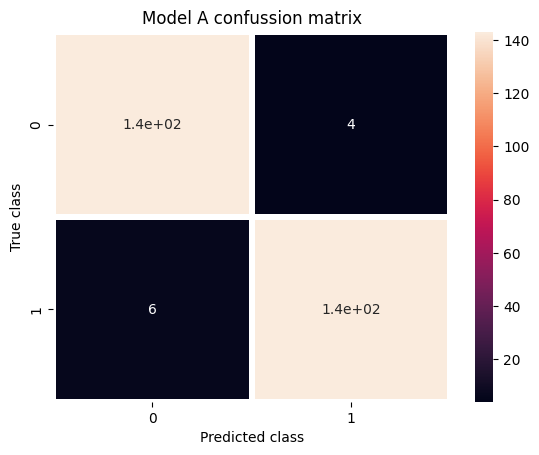

In [ ]:
import seaborn as sns

matrix = confusion_matrix(y_test_under,y_pred)
sns.heatmap(matrix, annot=True, linewidths=3)
plt.title('Model A confussion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')

# Model 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_under, y_train_under)


<ipython-input-22-4e58b888ed48>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_under, y_train_under)


RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

y_RFpred = clf.predict(X_test_under)
print('Accuracy of RandomForest is:', accuracy_score(y_test_under, y_RFpred))


Accuracy of RandomForest is: 0.972972972972973


In [ ]:
ReportRF = classification_report(y_test_under,y_RFpred)

print(ReportRF)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       147
           1       0.98      0.97      0.97       149

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



Text(50.722222222222214, 0.5, 'True class')

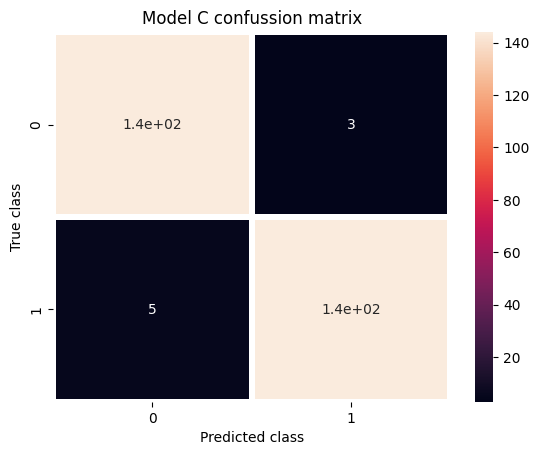

In [ ]:
matrixB = confusion_matrix(y_test_under,y_RFpred)
sns.heatmap(matrixB, annot=True, linewidths=3)
plt.title('Model C confussion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')

# Model 3: Support Vector Machine

In [16]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

SVClass = SVC(C=1.0, kernel= 'linear')
SVClass.fit(X_train_under, y_train_under)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

Text(50.722222222222214, 0.5, 'True class')

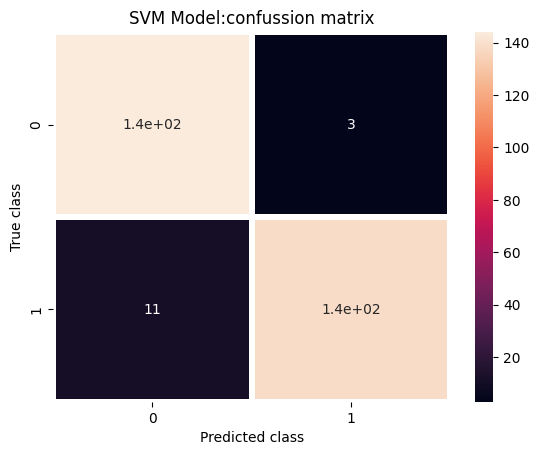

In [24]:
import seaborn as sns
matrixSVM = confusion_matrix(y_test_under, y_SVMpred)
sns.heatmap(matrixSVM, annot=True, linewidths=3)
plt.title('SVM Model:confussion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')